# SIGN LANGUAGE

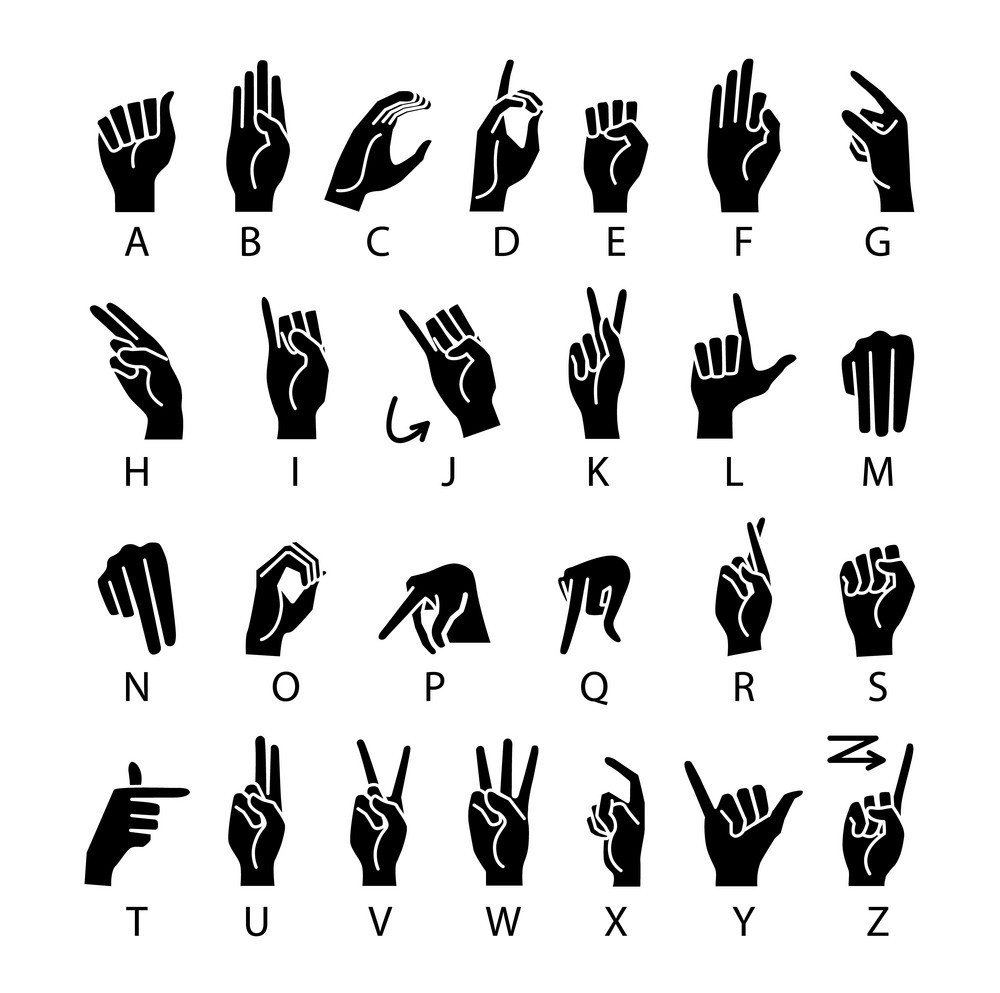

In [6]:
from IPython.display import Image
Image("Sign.jpg")

# About the data

The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabet letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2....pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. The original hand gesture image data represented multiple users repeating the gesture against different backgrounds.

## Objectives in this project:
 -  View the data as an image
 -  Train different classifiers
 -  Compare performance for different classifiers using various metrics


In [7]:
## load the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# splitting dataset into train and test

In [9]:
df=pd.read_csv("sign_mnist_train.csv")

In [10]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [8]:
df.shape


(27455, 785)

## we have 27455 cases, 785 features and 24 labels

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

train.shape

(21964, 785)

In [13]:
test.shape

(5491, 785)

In [19]:
labels = train['label'].values

In [10]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

# As we can see that 9 and 25 are missing that are J and Z because they are motion signs.

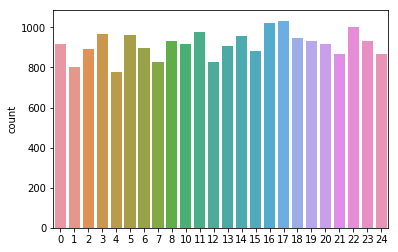

In [20]:
plt.figure()
sns.countplot(x =labels)

# Here we see that the data is almost uniform.

In [21]:
train.drop('label', axis = 1, inplace = True)

C:\Users\harman\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [25]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [26]:
print (images)

[[175 177 180 ... 255 255 255]
 [147 148 150 ... 179 177 177]
 [153 157 160 ... 236 236 234]
 ...
 [133 135 139 ... 118 173 200]
 [ 90  98 114 ... 223 223 223]
 [176 181 184 ... 216 214 212]]


In [27]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [28]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

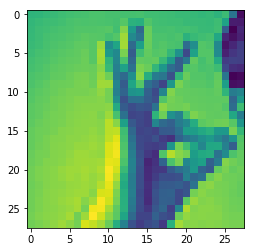

In [29]:
plt.imshow(images[1].reshape(28,28))

In [30]:
print (labels[1])

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 0)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


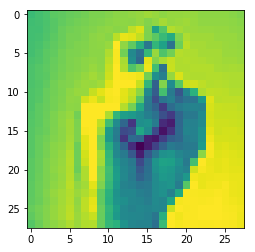

In [32]:
plt.imshow(x_test[0].reshape(28,28))
print (y_test[0])

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(x_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {}'
     .format(clf.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {}'
     .format(clf.score(x_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.0
Accuracy of Decision Tree classifier on test set: 0.8406676783004552


In [35]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train) 

In [40]:
accuracy = knn.score(x_test, y_test) 

In [37]:
 knn.fit(x_train,y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [41]:
print(accuracy)

0.9761760242792109


In [42]:
knn_predictions = knn.predict(x_test)  

In [43]:
from sklearn import metrics as m
m.accuracy_score(y_test,knn_predictions)

0.9761760242792109